In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [126]:
df = pd.read_csv(r"D:\Data\ML\Logistic Regression\Pima Indians Diabetes Dataset.xlsx.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
# # Replace 0s with np.nan in relevant columns
# #cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

In [130]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# # Check
# df_imputed.describe()

# Replace invalid 0s in columns with Median 

In [131]:
for columns in columns_with_invalid_zeros:
    median_value = df[columns].median()
    df[columns] = df[columns].replace(0, median_value)

In [132]:
for columns in columns_with_invalid_zeros:
    print(f"{columns} has {(df[columns]==0).sum()} zero values")

Glucose has 0 zero values
BloodPressure has 0 zero values
SkinThickness has 0 zero values
Insulin has 0 zero values
BMI has 0 zero values


In [133]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# normalise data

In [134]:
# soling data to predctators and target
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)

In [135]:
# standardizing data
scalar = StandardScaler()

X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

# Spliting data to training and testing set

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training and predicting

In [137]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [138]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# evaluation of the metrics

In [139]:
#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [140]:
# classificatio matrx
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



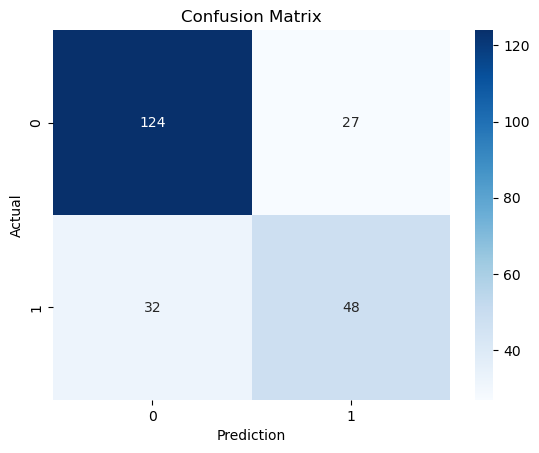

In [141]:
#true false
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

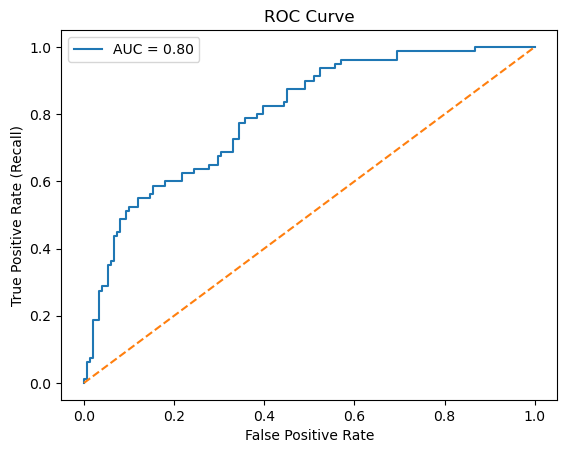

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()


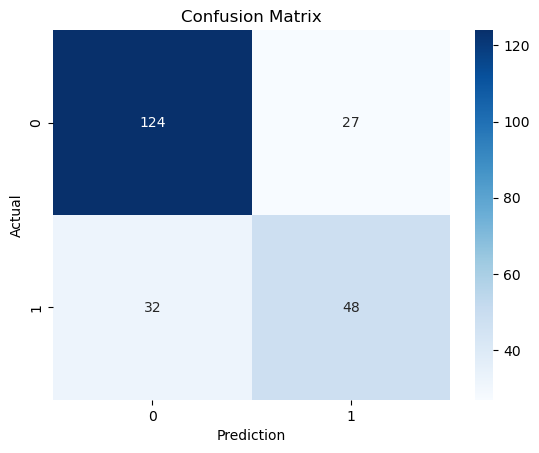

In [143]:
#true false
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [144]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['BMI_Category']

0           Obese
1      Overweight
2          Normal
3      Overweight
4           Obese
          ...    
763         Obese
764         Obese
765    Overweight
766         Obese
767         Obese
Name: BMI_Category, Length: 768, dtype: category
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [146]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100],
                         labels=['20s', '30s', '40s', '50s', '60+'])
df['Age_Group']

0      40s
1      30s
2      30s
3      20s
4      30s
      ... 
763    60+
764    20s
765    20s
766    40s
767    20s
Name: Age_Group, Length: 768, dtype: category
Categories (5, object): ['20s' < '30s' < '40s' < '50s' < '60+']

In [145]:
df['Glucose_Level'] = pd.cut(df['Glucose'], bins=[0, 90, 120, 200],
                             labels=['Low', 'Normal', 'High'])
df['Glucose_Level']

0        High
1         Low
2        High
3         Low
4        High
        ...  
763    Normal
764      High
765      High
766      High
767    Normal
Name: Glucose_Level, Length: 768, dtype: category
Categories (3, object): ['Low' < 'Normal' < 'High']

In [147]:
df['BMI_Age'] = df['BMI'] * df['Age']
df['BMI_Age']

0      1680.0
1       824.6
2       745.6
3       590.1
4      1422.3
        ...  
763    2072.7
764     993.6
765     786.0
766    1414.7
767     699.2
Name: BMI_Age, Length: 768, dtype: float64

In [153]:
from sklearn.ensemble import RandomForestClassifier
X1 = df.drop('Outcome', axis=1)
y1 = df['Outcome']

X1 = pd.get_dummies(X1)  # for categorical features like BMI_Category

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X1_train, y1_train)

preds = model.predict(X1_test)

print(accuracy_score(y1_test, preds))
print(classification_report(y1_test, preds))


0.7727272727272727
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [150]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Glucose_Level,Age_Group,BMI_Age
0,6,148,72,35,30.5,33.6,0.627,50,1,Obese,High,40s,1680.0
1,1,85,66,29,30.5,26.6,0.351,31,0,Overweight,Low,30s,824.6
2,8,183,64,23,30.5,23.3,0.672,32,1,Normal,High,30s,745.6
3,1,89,66,23,94.0,28.1,0.167,21,0,Overweight,Low,20s,590.1
4,0,137,40,35,168.0,43.1,2.288,33,1,Obese,High,30s,1422.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,Obese,Normal,60+,2072.7
764,2,122,70,27,30.5,36.8,0.340,27,0,Obese,High,20s,993.6
765,5,121,72,23,112.0,26.2,0.245,30,0,Overweight,High,20s,786.0
766,1,126,60,23,30.5,30.1,0.349,47,1,Obese,High,40s,1414.7
